# Урок 1. Алгоритм линейной регрессии. Градиентный спуск

### Простая линейная регрессия

Линейная регрессия - это метод прогнозирования, которому уже более 200 лет.  
Простая линейная регрессия - это отличный первый алгоритм машинного обучения для самостоятельной реализации, поскольку он быстро настраивается и достаточно прост для понимания.  
В этом уроке вы узнаете, как реализовать простой алгоритм линейной регрессии с нуля в Python. 

После завершения этого урока вы узнаете:  
- Как реализовать линейную регрессию "с нуля" на Python.  
- Как найти оптимальные коэффициенты линейной регрессии.  
- Как делать прогнозы и оценить работу модели.  

Давайте начнем!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format='retina'
import warnings
warnings.simplefilter('ignore')

Линейная регрессия предполагает линейную зависимость между входными переменными (X) и целевой переменной (y).  
Это означает, что выход (y) может быть вычислен как **линейная комбинация** входных переменных (X).  
Если Х состоит из одной переменной, то линейная регрессия называется простой.  
В простой линейной регрессии мы можем использовать статистику обучающих данных для оценки коэффициентов, требуемых моделью для прогнозирования новых данных.  
Уравнение простой линейной регрессии может быть записано как:
$$y = w_0 + w_1 × X$$  
Как видите, это простое уравнение прямой, известное нам еще со школы.  
w0 и w1 - это коэффициенты, которые мы должны найти.  
w0 называется смещением или bias и отвечает за смещение регрессионной прямой по оси y относительно начала координат.  
w1 - это коэффициент при признаке Х, он отвечает за угол наклона прямой.  
Как только коэффициенты известны, мы можем использовать это уравнение для оценки целевой переменной (y), на новых данных (X_test).  
Когда признаков больше чем один, уравнение линейной регрессии принимает следующий вид:  
$$y = w_0 + \sum_{i=1}^m w_i x_i$$  
Если мы добавим фиктивный признак x0 = 1, тогда уравнение можно переписать чуть более компактно, убрав w0 под знак суммы:
$$y = \sum_{i=0}^m w_i x_i = \vec{w}^T \vec{x}$$. 
Так же его можно записать в мтаричном виде:  
$$\vec y = X \vec w + \epsilon$$  
ϵ – непрогнозируемая ошибка модели  

Непрогнозируемая ошибка складывается из:
- Смещение (Bias) – средняя ошибка по всевозможным наборам данных (показывает, насколько модель отличается от "идеальной")
- Дисперсия (Var) – вариативность ошибки (то, на сколько ошибка будет отличаться, если обучать модель на разных данных).  
Показывает, насколько утойчива модель.
- неустранимой ошибки: σ

![bias_var.png](bias_var.png)

Сгенерируем простой пример для наглядности:

In [2]:
X = np.array([[1, 1, 1, 1, 1,
               1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 
               0, 5, 10, 1, 2]]).T

In [3]:
X  # <- матрица "объекты-признаки" ([x0, x1])

array([[ 1,  1],
       [ 1,  1],
       [ 1,  2],
       [ 1,  1],
       [ 1,  3],
       [ 1,  0],
       [ 1,  5],
       [ 1, 10],
       [ 1,  1],
       [ 1,  2]])

In [4]:
X.shape

(10, 2)

In [5]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

Построим модель линейной регрессии!

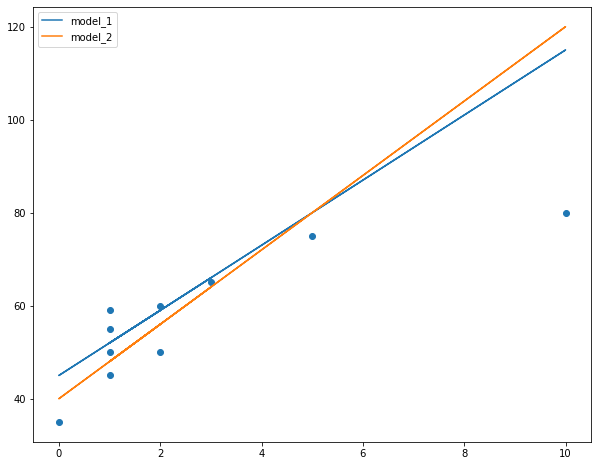

In [6]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.legend();

Сделаем прогноз значений y на обучающих данных:

In [7]:
y_pred1 = 45*np.ones(10) + X[:,1]*7
y_pred2 = 40*np.ones(10) + X[:,1]*8

In [8]:
y_pred1

array([ 52.,  52.,  59.,  52.,  66.,  45.,  80., 115.,  52.,  59.])

In [9]:
y_pred2

array([ 48.,  48.,  56.,  48.,  64.,  40.,  80., 120.,  48.,  56.])

In [10]:
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

### Как мы можем оценить работу модели?

1. Разность прогнозов

In [11]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
print(f'Разность прогнозов наших моделей: {err1}, {err2}')

Разность прогнозов наших моделей: -58.0, -34.0


2. Средняя абсолютная ошибка (MAE)

In [12]:
mae_1 = np.sum(np.abs(y - y_pred1))/len(y)
mae_2 = np.sum(np.abs(y - y_pred2))/len(y)
print(f'MAE наших моделей: {mae_1}, {mae_2}')

MAE наших моделей: 8.0, 8.4


In [13]:
def calc_mae(y, y_pred):
    return np.mean(np.abs(y - y_pred))

3. Среднеквадратичная ошибка (MSE)

In [14]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
print(f'MSE наших моделей: {mse_1}, {mse_2}')

MSE наших моделей: 154.4, 188.6


In [15]:
def calc_mse(y, y_pred):
    return np.mean((y - y_pred)**2)

4. RMSE

In [16]:
rmse_1 = np.sqrt(np.mean((y - y_pred1)**2))
rmse_2 = np.sqrt(np.mean((y - y_pred2)**2))
print(f'MSE наших моделей: {rmse_1}, {rmse_2}')

MSE наших моделей: 12.425779653607254, 13.733171520082315


5. Коэффициент детерминации (R2)

In [17]:
# предлагаю реализовать самим :)

In [18]:
def rSquare(y, y_pred):
    sse = ((y - y_pred) ** 2).sum(axis=0, dtype=np.float64)
    tse = ((y - np.average(y, axis=0)) ** 2).sum(axis=0, dtype=np.float64)
    r2_score = 1 - (sse / tse)
    return r2_score

In [19]:
r2_1 = rSquare(y, y_pred1)
r2_2 = rSquare(y, y_pred2)
print(f'R2 наших моделей: {r2_1}, {r2_2}')

R2 наших моделей: 0.0689821514712976, -0.13724071394114823


In [20]:
from sklearn.metrics import r2_score

r2_score_1 = r2_score(y, y_pred1)
r2_score_2 = r2_score(y, y_pred2)

print(f'R2 наших моделей: {r2_score_1}, {r2_score_2}')

R2 наших моделей: 0.0689821514712976, -0.13724071394114823


In [21]:
# Значения самописной функции и sklearn идентичны :)

### Методы поиска оптимальных параметров

1. **Метод наименьших квадратов (МНК)**   
Суть метода: минимизируем среднеквадратичную ошибку (MSE) между реальным значением целевой переменной и прогнозом, выданным моделью.   
$$\large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$$  

Для этого необходимо вычислить производные по параметрам модели, приравнять их к нулю и решить полученные уравнения относительно w  
$$\large\mathcal{L}{\partial \vec{w}} = 0$$
$$\vec{w} = \left(X^T X\right)^{-1} X^T \vec{y}$$  

Реализуем этот метод! (но для этого придется перемножить пару матриц О_о)  
Для тех, кто подзабыл как это делается: http://matrixmultiplication.xyz

In [22]:
W = np.linalg.inv(np.dot(X.T, X)) @ X.T @ y
print(W)

[47.23214286  3.91071429]


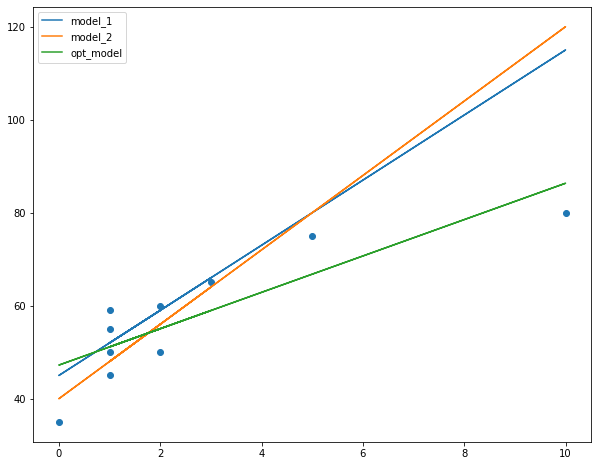

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:,1], y)
plt.plot(X[:,1], 45*np.ones(10) + X[:,1]*7, label='model_1')
plt.plot(X[:,1], 40*np.ones(10) + X[:,1]*8, label='model_2')
plt.plot(X[:,1], W[0] + W[1] * X[:,1], label='opt_model')
plt.legend();

Оценка модели:

In [24]:
# метрики качества предыдущих моделей:
calc_mse(y, y_pred1)

154.4

In [25]:
calc_mae(y, y_pred1)

8.0

In [26]:
# прогноз модели с оптимальными параметрами:
y_pred3 = W[0] + W[1]*X[:,1]
y_pred3

array([51.14285714, 51.14285714, 55.05357143, 51.14285714, 58.96428571,
       47.23214286, 66.78571429, 86.33928571, 51.14285714, 55.05357143])

In [27]:
calc_mse(y, y_pred3)

45.937499999999986

In [28]:
calc_mae(y, y_pred3)

6.182142857142856

**2. Градиентный спуск**  

Градиентный спуск - это итеративный алгоритм поиска весов признаков.  
Алгоритм обновляет веса с учетом градиента функции потерь:  
w = w − learning rate × error × X

In [29]:
W = np.array([0.01, 0.1])

In [30]:
y_pred = np.dot(X, W)
y_pred

array([0.11, 0.11, 0.21, 0.11, 0.31, 0.01, 0.51, 1.01, 0.11, 0.21])

In [31]:
calc_mse(y, y_pred)

3423.6233

In [32]:
lr = 0.01

In [33]:
grad_0 = (1/len(y))*lr*(2*np.sum(X[:,0]*(W[0]*X[:,0] - y)))
grad_1 = (1/len(y))*lr*(2*np.sum(X[:,1]*(W[1]*X[:,1] - y)))

In [34]:
W[0] = W[0] - grad_0; W[0]

1.1578

In [35]:
W[1] = W[1] - grad_1; W[1]

3.6688

In [36]:
y_pred = np.dot(X, W)
y_pred

array([ 4.8266,  4.8266,  8.4954,  4.8266, 12.1642,  1.1578, 19.5018,
       37.8458,  4.8266,  8.4954])

In [37]:
calc_mse(y, y_pred)

2227.5964155919996

### Домашнее задание:

1. Подберите скорость обучения (lr) и количество итераций (epoch):

In [38]:
n = X.shape[1]
epoch = 300
lr = 0.001
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.001)

In [39]:
for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 0, MSE: 3173.15, веса: [1.551 2.2  ]
# итерация: 100, MSE: 414.5541707681394, веса: [21.1833847   8.72081594]
# итерация: 200, MSE: 175.90244862743484, веса: [31.7649089   6.76685736]


In [40]:
# Итак, методом подбора определим оптимальное соотношение скорости обучения и количества итераций по MSE. Для наглядности
# примем epoch = 4001, велечину lr подбираем в диапазоне от 0.05 до 0.0015:

n = X.shape[1]
epoch = 4001
lr = 0.0014
W = np.array([1, 0.5])
W, lr

(array([1. , 0.5]), 0.0014)

In [41]:
for i in range(epoch):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    for j in range(W.shape[0]):
        W[j] -= lr * (1/n * 2 * np.sum(X[:,j] * (y_pred - y)))
    if i % 100 == 0:
        print(f'# итерация: {i}, MSE: {err}, веса: {W}')

# итерация: 0, MSE: 3173.15, веса: [1.7714 2.88  ]
# итерация: 100, MSE: 288.49383624031765, веса: [26.1460053   7.80443089]
# итерация: 200, MSE: 102.21069101278312, веса: [37.07570315  5.78617857]
# итерация: 300, MSE: 58.992908388192646, веса: [42.34014842  4.81405848]
# итерация: 400, MSE: 48.96636125906345, веса: [44.87584378  4.34582294]
# итерация: 500, MSE: 46.640197323122585, веса: [46.09719771  4.12029059]
# итерация: 600, MSE: 46.10052612952179, веса: [46.6854803   4.01165971]
# итерация: 700, MSE: 45.97532214337856, веса: [46.96883502  3.95933609]
# итерация: 800, MSE: 45.946274756132325, веса: [47.10531687  3.93413367]
# итерация: 900, MSE: 45.939535747800186, веса: [47.17105531  3.92199457]
# итерация: 1000, MSE: 45.93797229450521, веса: [47.20271916  3.9161476 ]
# итерация: 1100, MSE: 45.93760957256082, веса: [47.21797051  3.91333132]
# итерация: 1200, MSE: 45.937525420888775, веса: [47.22531655  3.91197482]
# итерация: 1300, MSE: 45.93750589765888, веса: [47.22885487  3

In [42]:
# Таким образом, методом подбора мы определили, что оптимальным соотношением значений MSE при минимальном 
# количестве эпох обучения, является соотношение скорости обучения при (lr)=0.0014 и количестве итераций (epoch)=2800.